In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [88]:
from zipfile import ZipFile as zippy
  
# specifying the zip file name
file_name = "/kaggle/input/facial-keypoints-detection/training.zip"
  
# opening the zip file in READ mode
with zippy(file_name, 'r') as zips:
    zips.extractall()


In [89]:
# from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/kaggle/input/facial-keypoints-detection/test.zip"
  
# opening the zip file in READ mode
with zippy(file_name, 'r') as zips:
    zips.extractall()

In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('/kaggle/input/facial-keypoints-detection/SampleSubmission.csv')
Idlookup=pd.read_csv('/kaggle/input/facial-keypoints-detection/IdLookupTable.csv')


In [92]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [93]:
train.fillna(method = 'ffill',inplace = True)

In [94]:
imag = []
for i in range(0,7049):
    img = train['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    

In [95]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

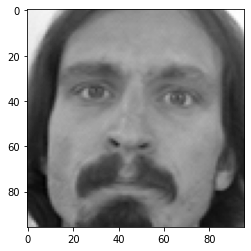

In [96]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [97]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [98]:
train.drop('Image', axis=1, inplace=True)

In [99]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.358588,37.649140,30.306631,37.975901,59.224060,36.675731,73.746775,35.619961,37.214171,38.942849,...,48.374186,62.715884,69.586932,73.195985,33.799680,76.964546,50.425299,74.982529,48.565976,78.979256
std,3.447098,3.152072,3.083087,3.032590,1.537961,1.581946,1.961901,2.184829,1.393110,1.470456,...,4.280038,5.720567,4.932241,3.242852,2.350229,2.578721,2.543271,3.294983,4.266848,5.406621
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082643,35.900605,28.782316,36.327178,59.255347,36.065143,73.942694,34.624653,37.478531,39.355685,...,46.602370,59.292697,65.731401,71.862041,34.232759,77.339429,49.471414,75.963592,46.571821,75.553726
50%,66.493907,37.526919,30.253135,37.812736,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,48.424713,63.451421,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.588662,78.704640
75%,68.024628,39.254400,31.768407,39.565928,59.255347,36.499692,73.942694,35.902613,37.478531,39.398041,...,50.330437,66.492686,72.600433,72.591200,34.232759,77.339429,51.599453,75.963592,50.676559,82.236528
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [100]:
train_y=train.to_numpy()

In [101]:
train_y.shape

(7049, 30)

In [107]:
from keras import Sequential, optimizers
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional,ConvLSTM2D,GRU,SimpleRNN,RNN
from keras import regularizers
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D, Conv2D , MaxPooling2D

model = Sequential()
model.add((Conv2D(filters=128, kernel_size=4, input_shape=(96, 96, 1),activation='relu', padding='same')))
model.add(Dense(64,activation='relu'))

model.add(Conv2D(32, 4, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Conv2D(16, 4, activation='relu'))

model.add((MaxPooling2D(pool_size=(4,4))))
# model.add(Dense(32,activation='relu'))
# model.add(Conv2D(16, 6, activation='relu'))
# model.add((MaxPooling2D(pool_size=(2,2))))
# model.add(Conv2D(16, 4, activation='relu'))
# model.add((MaxPooling2D(pool_size=(2,2))))

model.add(Flatten())
# model.add(Dense(16,activation='relu'))


model.add(Dense(30))


opt = optimizers.Adam(learning_rate=0.0001)
#lr=0.0005
# optimizer='adam', 
#               loss='mean_squared_error',
#               metrics=['mae']
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['msle'])

In [108]:
model.build()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 96, 96, 128)       2176      
_________________________________________________________________
dense_33 (Dense)             (None, 96, 96, 64)        8256      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 93, 93, 32)        32800     
_________________________________________________________________
dense_34 (Dense)             (None, 93, 93, 32)        1056      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 90, 90, 16)        8208      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 7744)             

In [109]:
model.fit(X_train, train_y, batch_size=128, epochs=60)

Epoch 1/60
56/56 [==============================] - 7s 105ms/step - loss: 4.4651 - msle: 4.4651
Epoch 2/60
56/56 [==============================] - 6s 105ms/step - loss: 0.6062 - msle: 0.6062
Epoch 3/60
56/56 [==============================] - 6s 106ms/step - loss: 0.5921 - msle: 0.5921
Epoch 4/60
56/56 [==============================] - 6s 106ms/step - loss: 0.5868 - msle: 0.5868
Epoch 5/60
56/56 [==============================] - 6s 106ms/step - loss: 0.5823 - msle: 0.5823
Epoch 6/60
56/56 [==============================] - 6s 106ms/step - loss: 0.2511 - msle: 0.2511
Epoch 7/60
56/56 [==============================] - 6s 105ms/step - loss: 0.0454 - msle: 0.0454
Epoch 8/60
56/56 [==============================] - 6s 106ms/step - loss: 0.0408 - msle: 0.0408
Epoch 9/60
56/56 [==============================] - 6s 106ms/step - loss: 0.0399 - msle: 0.0399
Epoch 10/60
56/56 [==============================] - 6s 105ms/step - loss: 0.0372 - msle: 0.0372
Epoch 11/60
56/56 [====================

In [54]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [55]:
# model = Sequential()

# model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())


# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# # model.add(BatchNormalization())
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())


# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(30))
# model.summary()

In [56]:
# model.compile(optimizer='adam', 
#               loss='mean_squared_error',
#               metrics=['mae'])

In [57]:
# model.fit(X_train, train_y, batch_size=128, epochs=20, validation_split=0.1)

In [58]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [59]:
image = []
for i in range(0,len(test)):
    img = test['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    image.append(img)
    

In [60]:
image_list = np.array(image,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

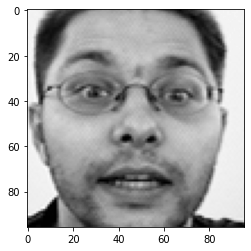

In [61]:
plt.imshow(X_train[0].reshape(96,96),cmap='gray')
plt.show()

In [110]:
pred=model.predict(X_train)
pred

array([[69.632164, 41.08362 , 33.33751 , ..., 74.16625 , 46.741985,
        86.16893 ],
       [67.74097 , 36.476074, 29.38759 , ..., 72.716705, 49.888298,
        84.47801 ],
       [66.04847 , 37.458294, 31.344904, ..., 73.8201  , 48.60081 ,
        79.76837 ],
       ...,
       [68.406906, 37.512486, 32.375534, ..., 78.12947 , 52.19919 ,
        80.6594  ],
       [69.799736, 39.95315 , 30.10291 , ..., 76.82176 , 49.89607 ,
        85.16063 ],
       [67.32138 , 40.62402 , 32.4187  , ..., 78.30124 , 48.361546,
        80.682106]], dtype=float32)

In [111]:
# lookid_list = list(lookid_data['FeatureName'])
# imageID = list(lookid_data['ImageId']-1)
# pre_list = list(pred)

In [112]:
Idlookup

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [113]:
lookid_list = list(Idlookup['FeatureName'])
imageID = list(Idlookup['ImageId']-1)
pre_list = list(pred)

In [114]:
rowid = Idlookup['RowId']
rowid=list(rowid)

In [115]:
feature = []
for f in list(Idlookup['FeatureName']):
    feature.append(lookid_list.index(f))

In [116]:
# feature

In [117]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
    
# for x in imageID:
#     for y in feature:
#         preded.append(pre_list[x][y])

In [118]:
rowid = pd.Series(rowid,name = 'RowId')

In [119]:
loc = pd.Series(preded,name = 'Location')


In [120]:
submission = pd.concat([rowid,loc],axis = 1)


In [121]:
submission

,RowId,Location
0,1,69.632164
1,2,41.083618
2,3,33.337509
3,4,37.883701
4,5,60.722187
...,...,...
27119,27120,36.869946
27120,27121,44.610344
27121,27122,61.712696
27122,27123,44.480682


In [122]:
submission.to_csv('submission.csv',index = False)